In [3]:
# ─────────────────────────────────────────────────────────────
# BIG BLACK MONEY DATASET - FULL DATA ANALYSIS PROJECT (Google Colab)
# ─────────────────────────────────────────────────────────────

# Upload file directly in Colab
from google.colab import files
uploaded = files.upload()

Saving blackmoney.csv to blackmoney.csv


In [5]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# For interactive plots
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Set style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
%matplotlib inline

In [6]:
# Load the data (1 million rows → use chunks or low_memory=False)
# This dataset is ~1.2 GB → Colab can handle it

df = pd.read_csv('blackmoney.csv', low_memory=False)

# If the file is in Drive:
# df = pd.read_csv('/content/drive/MyDrive/blackmoney.csv', low_memory=False)

print(f"Dataset shape: {df.shape}")
df.head()

Dataset shape: (10000, 14)


,Transaction ID,Country,Amount (USD),Transaction Type,Date of Transaction,Person Involved,Industry,Destination Country,Reported by Authority,Source of Money,Money Laundering Risk Score,Shell Companies Involved,Financial Institution,Tax Haven Country
0,TX0000000001,Brazil,3.267530e+06,Offshore Transfer,2013-01-01 00:00:00,Person_1101,Construction,USA,True,Illegal,6,1,Bank_40,Singapore
1,TX0000000002,China,4.965767e+06,Stocks Transfer,2013-01-01 01:00:00,Person_7484,Luxury Goods,South Africa,False,Illegal,9,0,Bank_461,Bahamas
2,TX0000000003,UK,9.416750e+04,Stocks Transfer,2013-01-01 02:00:00,Person_3655,Construction,Switzerland,True,Illegal,1,3,Bank_387,Switzerland
3,TX0000000004,UAE,3.864201e+05,Cash Withdrawal,2013-01-01 03:00:00,Person_3226,Oil & Gas,Russia,False,Illegal,7,2,Bank_353,Panama
4,TX0000000005,South Africa,6.433784e+05,Cryptocurrency,2013-01-01 04:00:00,Person_7975,Real Estate,USA,True,Illegal,1,9,Bank_57,Luxembourg


In [7]:
# Basic info & data cleaning
df.info()

# Convert date
df['Date of Transaction'] = pd.to_datetime(df['Date of Transaction'])

# Convert categorical columns to category type (saves memory)
cat_cols = ['Country', 'Transaction Type', 'Person Involved', 'Industry',
            'Destination Country', 'Reported by Authority', 'Source of Money',
            'Financial Institution', 'Tax Haven Country']
for col in cat_cols:
    df[col] = df[col].astype('category')

# Boolean conversion
df['Reported by Authority'] = df['Reported by Authority'].map({True: 'Yes', False: 'No'})

df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Transaction ID               10000 non-null  object 
 1   Country                      10000 non-null  object 
 2   Amount (USD)                 10000 non-null  float64
 3   Transaction Type             10000 non-null  object 
 4   Date of Transaction          10000 non-null  object 
 5   Person Involved              10000 non-null  object 
 6   Industry                     10000 non-null  object 
 7   Destination Country          10000 non-null  object 
 8   Reported by Authority        10000 non-null  bool   
 9   Source of Money              10000 non-null  object 
 10  Money Laundering Risk Score  10000 non-null  int64  
 11  Shell Companies Involved     10000 non-null  int64  
 12  Financial Institution        10000 non-null  object 
 13  Tax Haven Country

,Transaction ID,Country,Amount (USD),Transaction Type,Date of Transaction,Person Involved,Industry,Destination Country,Reported by Authority,Source of Money,Money Laundering Risk Score,Shell Companies Involved,Financial Institution,Tax Haven Country
count,10000,10000,1.000000e+04,10000,10000,10000,10000,10000,10000,10000,10000.000000,10000.000000,10000,10000
unique,10000,10,NaN,5,NaN,6320,7,10,2,2,NaN,NaN,499,6
top,TX0000009984,China,NaN,Property Purchase,NaN,Person_7230,Finance,USA,No,Illegal,NaN,NaN,Bank_81,Panama
freq,1,1038,NaN,2086,NaN,7,1475,1061,7995,7017,NaN,NaN,36,1743
mean,NaN,NaN,2.501818e+06,NaN,2013-07-28 07:30:00,NaN,NaN,NaN,NaN,NaN,5.526400,4.469400,NaN,NaN
min,NaN,NaN,1.003180e+04,NaN,2013-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000,NaN,NaN
25%,NaN,NaN,1.279005e+06,NaN,2013-04-15 03:45:00,NaN,NaN,NaN,NaN,NaN,3.000000,2.000000,NaN,NaN
50%,NaN,NaN,2.501310e+06,NaN,2013-07-28 07:30:00,NaN,NaN,NaN,NaN,NaN,6.000000,4.000000,NaN,NaN
75%,NaN,NaN,3.722416e+06,NaN,2013-11-09 11:15:00,NaN,NaN,NaN,NaN,NaN,8.000000,7.000000,NaN,NaN
max,NaN,NaN,4.999812e+06,NaN,2014-02-21 15:00:00,NaN,NaN,NaN,NaN,NaN,10.000000,9.000000,NaN,NaN


In [8]:
# Exploratory Data Analysis

# Total volume of suspicious money
total_illegal = df[df['Source of Money'] == 'Illegal']['Amount (USD)'].sum()
total_legal = df[df['Source of Money'] == 'Legal']['Amount (USD)'].sum()

print(f"Total Illegal money moved: ${total_illegal:,.2f}")
print(f"Total Legal money moved: ${total_legal:,.2f}")
print(f"Illegal % of total: {100 * total_illegal/(total_illegal+total_legal):.2f}%")

Total Illegal money moved: $17,481,061,528.88
Total Legal money moved: $7,537,115,116.79
Illegal % of total: 69.87%


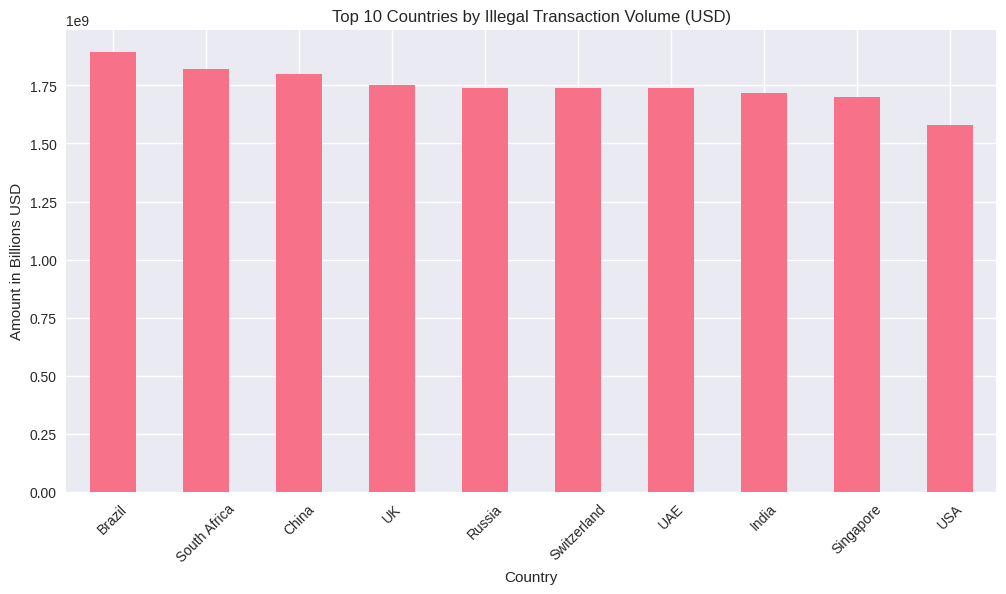

In [9]:
# Top 10 countries by illegal transactions volume
illegal_by_country = df[df['Source of Money']=='Illegal'].groupby('Country')['Amount (USD)'].sum().sort_values(ascending=False)

plt.figure(figsize=(12,6))
illegal_by_country.head(10).plot(kind='bar')
plt.title('Top 10 Countries by Illegal Transaction Volume (USD)')
plt.ylabel('Amount in Billions USD')
plt.xticks(rotation=45)
plt.show()

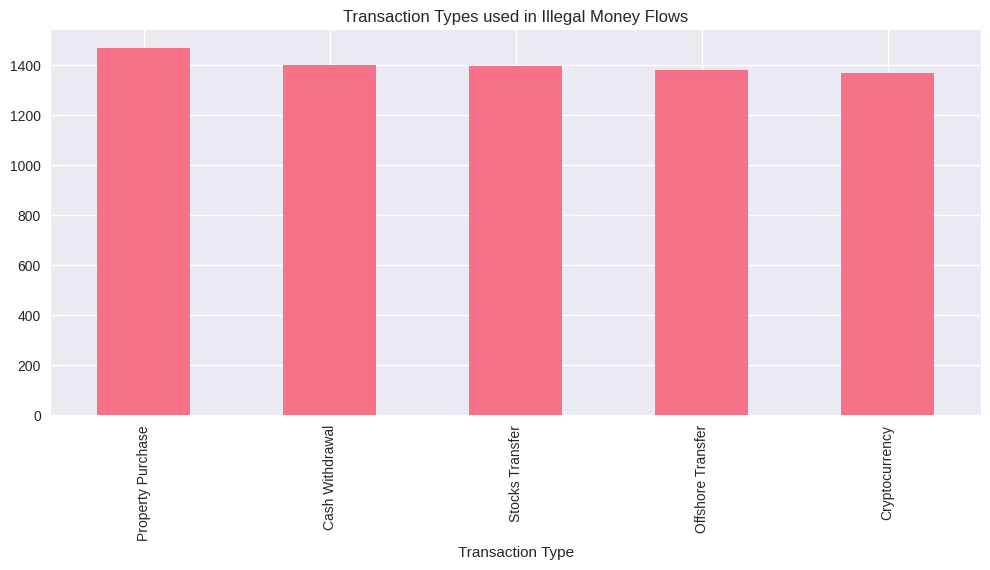

In [13]:
# Most common transaction types for illegal money
plt.figure(figsize=(12,5))
df[df['Source of Money']=='Illegal']['Transaction Type'].value_counts().plot(kind='bar')
plt.title('Transaction Types used in Illegal Money Flows')
plt.show()

In [14]:
# Tax havens usage
top_tax_havens = df['Tax Haven Country'].value_counts().head(10)

fig = px.bar(x=top_tax_havens.index, y=top_tax_havens.values,
             title="Top 10 Tax Havens Used",
             labels={'x': 'Tax Haven', 'y': 'Number of Transactions'},
             color=top_tax_havens.values, color_continuous_scale='Reds')
fig.show()

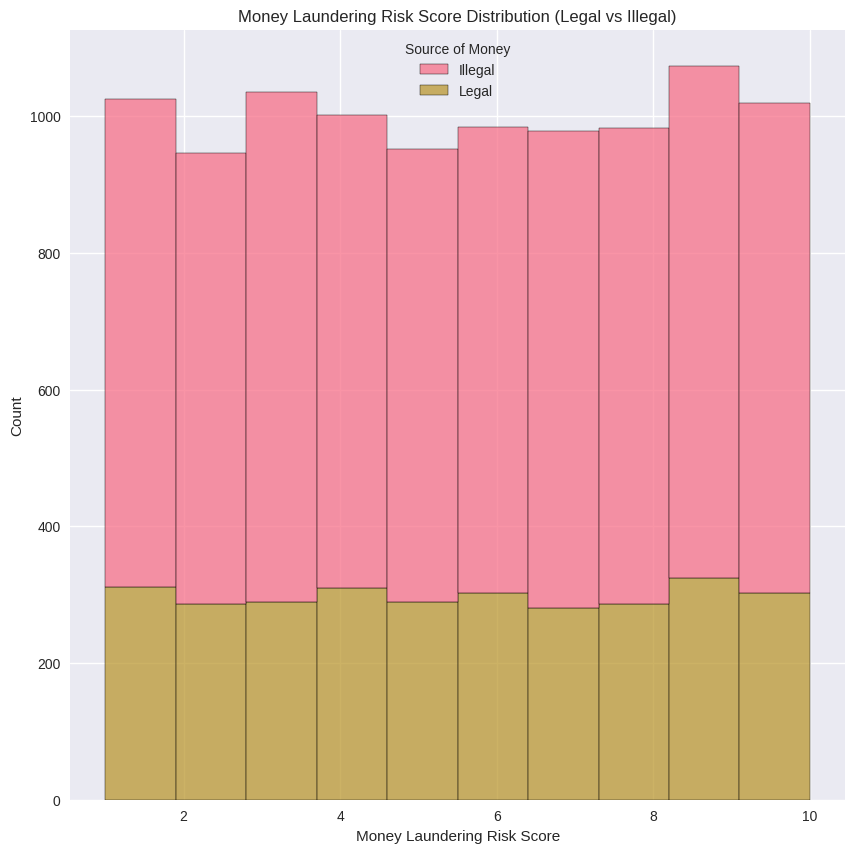

In [16]:
# Risk score distribution
plt.figure(figsize=(10,10))
sns.histplot(data=df, x='Money Laundering Risk Score', hue='Source of Money', multiple='stack', bins=10)
plt.title('Money Laundering Risk Score Distribution (Legal vs Illegal)')
plt.show()

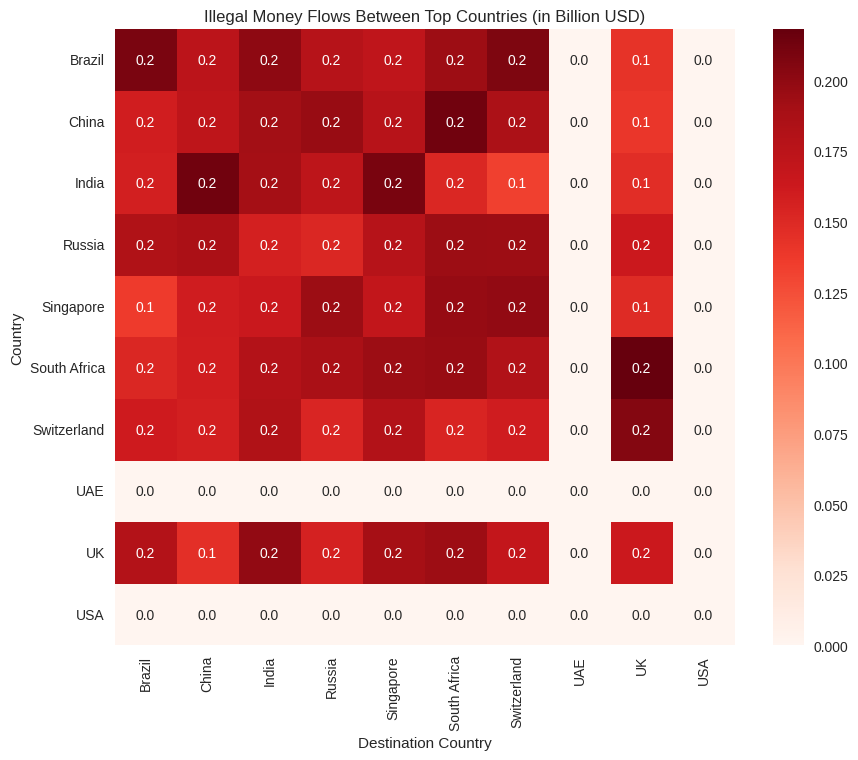

In [17]:
# Heatmap: Illegal money flows between countries
top_countries = df['Country'].value_counts().head(8).index
flow = df[df['Source of Money']=='Illegal']
flow = flow[flow['Country'].isin(top_countries) & flow['Destination Country'].isin(top_countries)]

pivot = flow.pivot_table(index='Country', columns='Destination Country', values='Amount (USD)', aggfunc='sum', fill_value=0)
plt.figure(figsize=(10,8))
sns.heatmap(pivot/1e9, annot=True, fmt='.1f', cmap='Reds')
plt.title('Illegal Money Flows Between Top Countries (in Billion USD)')
plt.show()

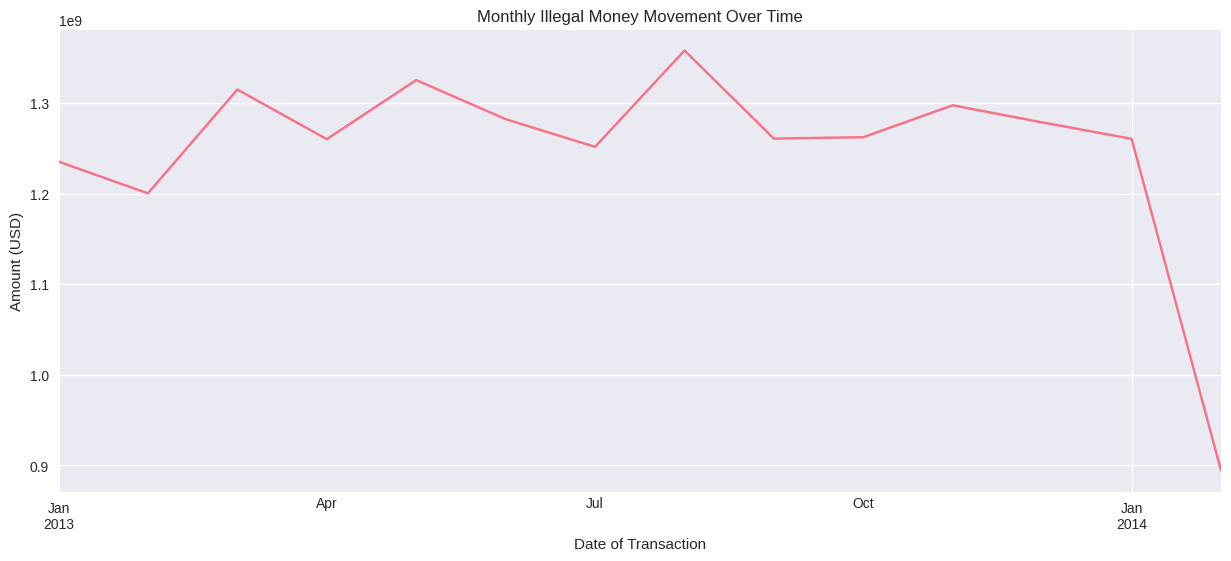

In [18]:
# Time series of illegal transactions
daily_illegal = df[df['Source of Money']=='Illegal'].set_index('Date of Transaction').resample('M')['Amount (USD)'].sum()

plt.figure(figsize=(15,6))
daily_illegal.plot()
plt.title('Monthly Illegal Money Movement Over Time')
plt.ylabel('Amount (USD)')
plt.show()

High-risk unreported transactions: 2,446 → $6,187,987,367.86


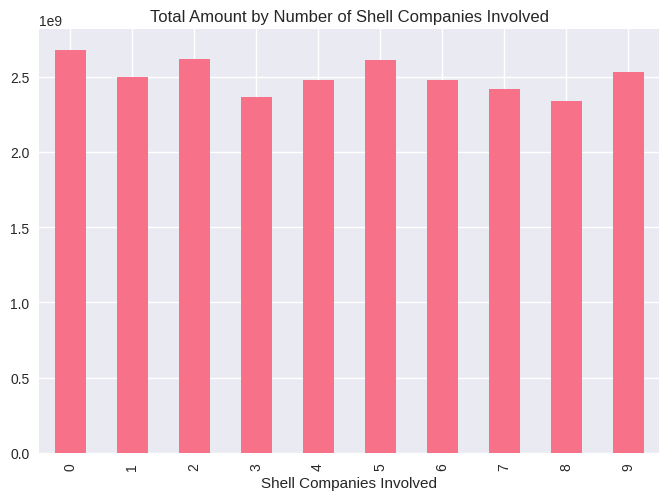

In [19]:
# High-risk patterns

# Transactions with very high risk score AND not reported
high_risk_unreported = df[(df['Money Laundering Risk Score'] >= 8) & (df['Reported by Authority'] == 'No')]
print(f"High-risk unreported transactions: {len(high_risk_unreported):,} → ${high_risk_unreported['Amount (USD)'].sum():,.2f}")

# Use of shell companies
shell_stats = df.groupby('Shell Companies Involved')['Amount (USD)'].sum()
shell_stats.plot(kind='bar', title='Total Amount by Number of Shell Companies Involved')
plt.show()

In [20]:
# Simple Anomaly Detection Model (Isolation Forest)

from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import LabelEncoder

# Prepare features
features = df.copy()
le = LabelEncoder()

features['Country_code'] = le.fit_transform(features['Country'])
features['TransType_code'] = le.fit_transform(features['Transaction Type'])
features['Industry_code'] = le.fit_transform(features['Industry'])
features['TaxHaven_code'] = le.fit_transform(features['Tax Haven Country'])
features['Reported_code'] = (features['Reported by Authority'] == 'Yes').astype(int)

X = features[['Amount (USD)', 'Money Laundering Risk Score', 'Shell Companies Involved',
              'Country_code', 'TransType_code', 'Industry_code', 'TaxHaven_code', 'Reported_code']]

# Train Isolation Forest
iso = IsolationForest(contamination=0.1, random_state=42)
df['Anomaly_Score'] = iso.fit_predict(X)
df['Anomaly'] = df['Anomaly_Score'].apply(lambda x: 'Anomaly' if x == -1 else 'Normal')

anomalies = df[df['Anomaly'] == 'Anomaly']
print(f"Detected {len(anomalies)} potential anomalies ({100*len(anomalies)/len(df):.2f}%)")
print(f"Total amount in anomalies: ${anomalies['Amount (USD)'].sum():,.2f}")

Detected 1000 potential anomalies (10.00%)
Total amount in anomalies: $2,461,287,552.68


In [21]:
# Final Dashboard (Plotly)

fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=('Illegal vs Legal Money', 'Top Tax Havens', 'Risk Score vs Amount', 'Anomalies Detected'),
    specs=[[{"type": "pie"}, {"type": "bar"}],
           [{"type": "scatter"}, {"type": "bar"}]]
)

# Pie chart
labels = ['Illegal', 'Legal']
values = [df[df['Source of Money']=='Illegal']['Amount (USD)'].sum(),
          df[df['Source of Money']=='Legal']['Amount (USD)'].sum()]

fig.add_trace(go.Pie(labels=labels, values=values, name="Source"), row=1, col=1)

# Tax havens
tax_haven_counts = df['Tax Haven Country'].value_counts().head(8)
fig.add_trace(go.Bar(x=tax_haven_counts.index, y=tax_haven_counts.values), row=1, col=2)

# Risk vs Amount scatter
sample = df.sample(5000)
fig.add_trace(go.Scatter(x=sample['Money Laundering Risk Score'], y=sample['Amount (USD)']/1e6,
                         mode='markers', marker=dict(color=sample['Source of Money'].map({'Illegal':'red','Legal':'blue'})),
                         name='Risk vs Amount'), row=2, col=1)

# Anomalies bar
anomaly_by_type = df[df['Anomaly']=='Anomaly']['Transaction Type'].value_counts()
fig.add_trace(go.Bar(x=anomaly_by_type.index, y=anomaly_by_type.values, marker_color='purple'), row=2, col=2)

fig.update_layout(height=800, title_text="Money Laundering Intelligence Dashboard", showlegend=False)
fig.show()

In [22]:
# Export result
df.to_csv('Big_Black_Money_Analyzed.csv', index=False)
anomalies.to_csv('Detected_Anomalies.csv', index=False)

print("Project completed! You now have:")
print("   • Full EDA")
print("   • Interactive dashboards")
print("   • Anomaly detection model")
print("   • Ready-to-present insights on global black money flows")

Project completed! You now have:
   • Full EDA
   • Interactive dashboards
   • Anomaly detection model
   • Ready-to-present insights on global black money flows
